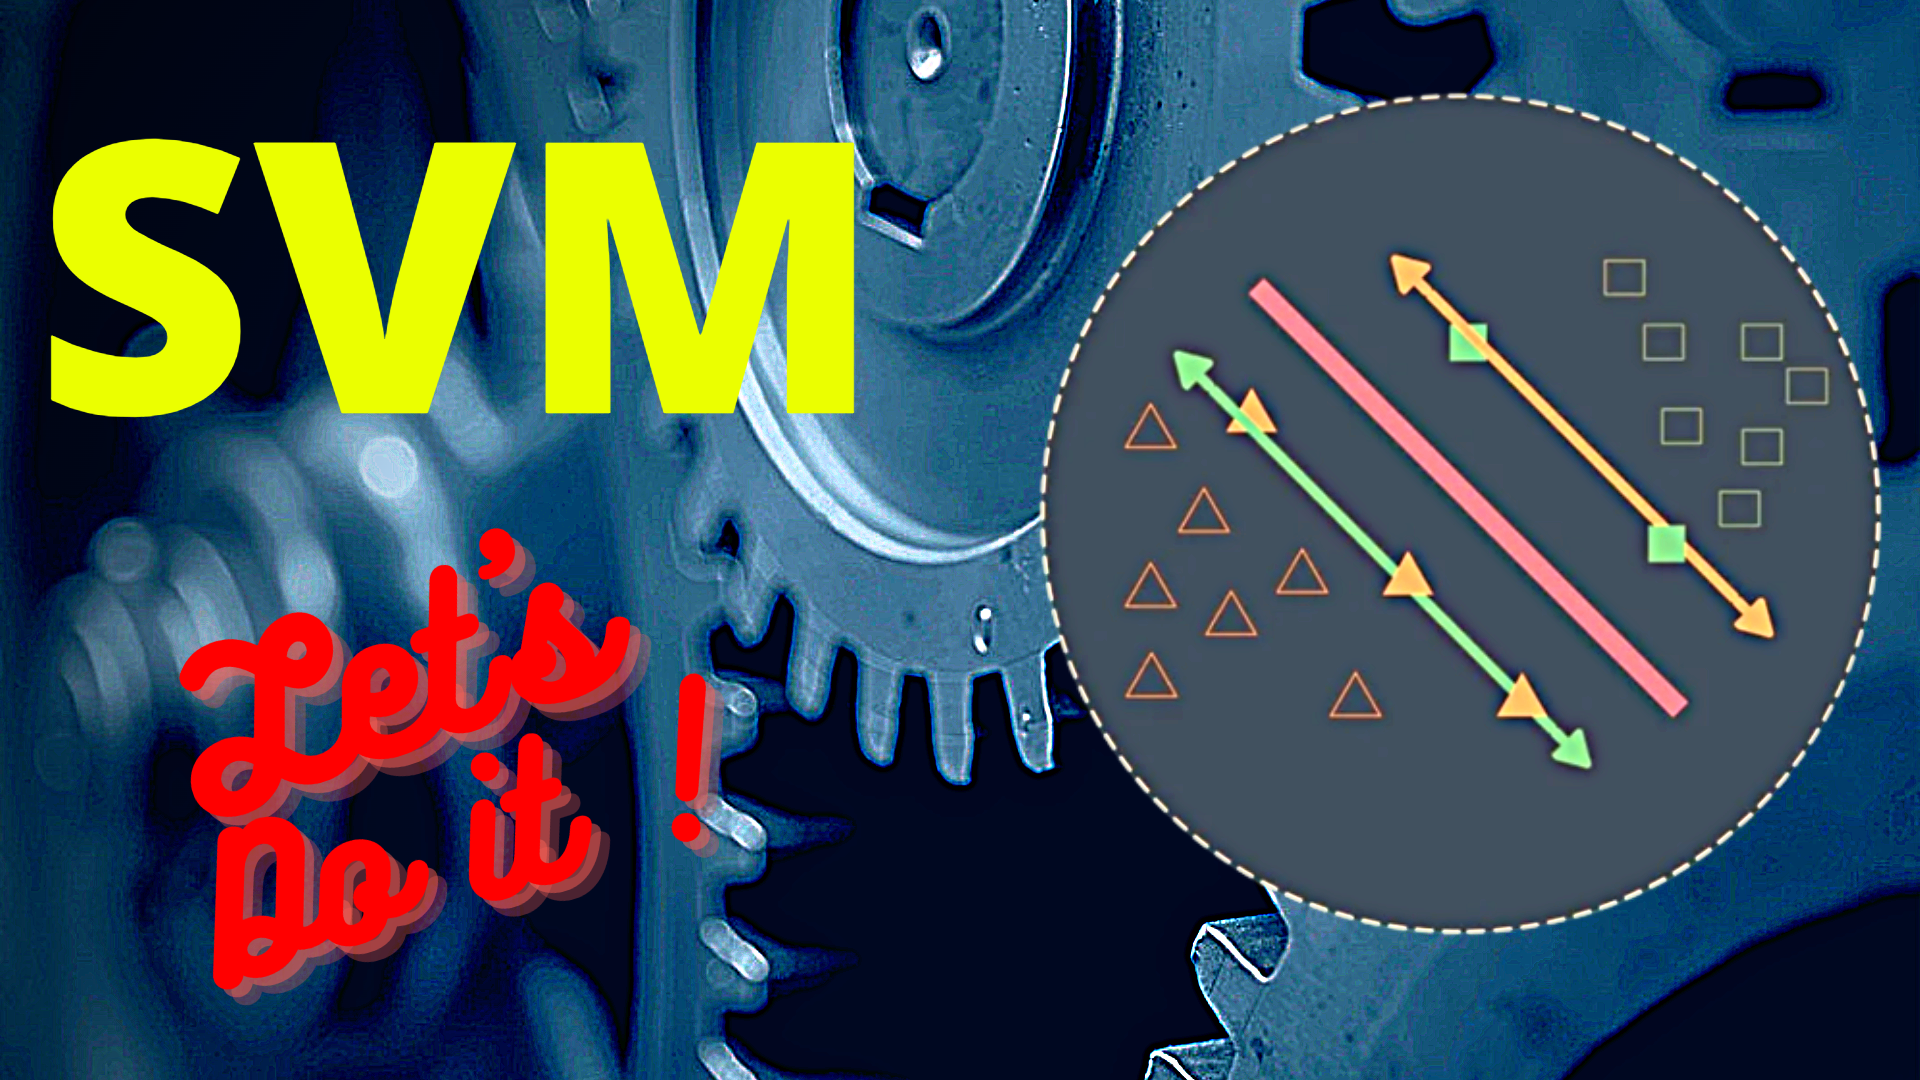

# Support Vector Machines Explained with iris data

## Brief Intorduction - 
#### . One of the most commonly used supervised machine learning classification algorithm. 
#### . It's regression version is also available but used least. 
#### . It is mainly Used in classification or segmentation.

### Some of the applications of Support Vector Machines
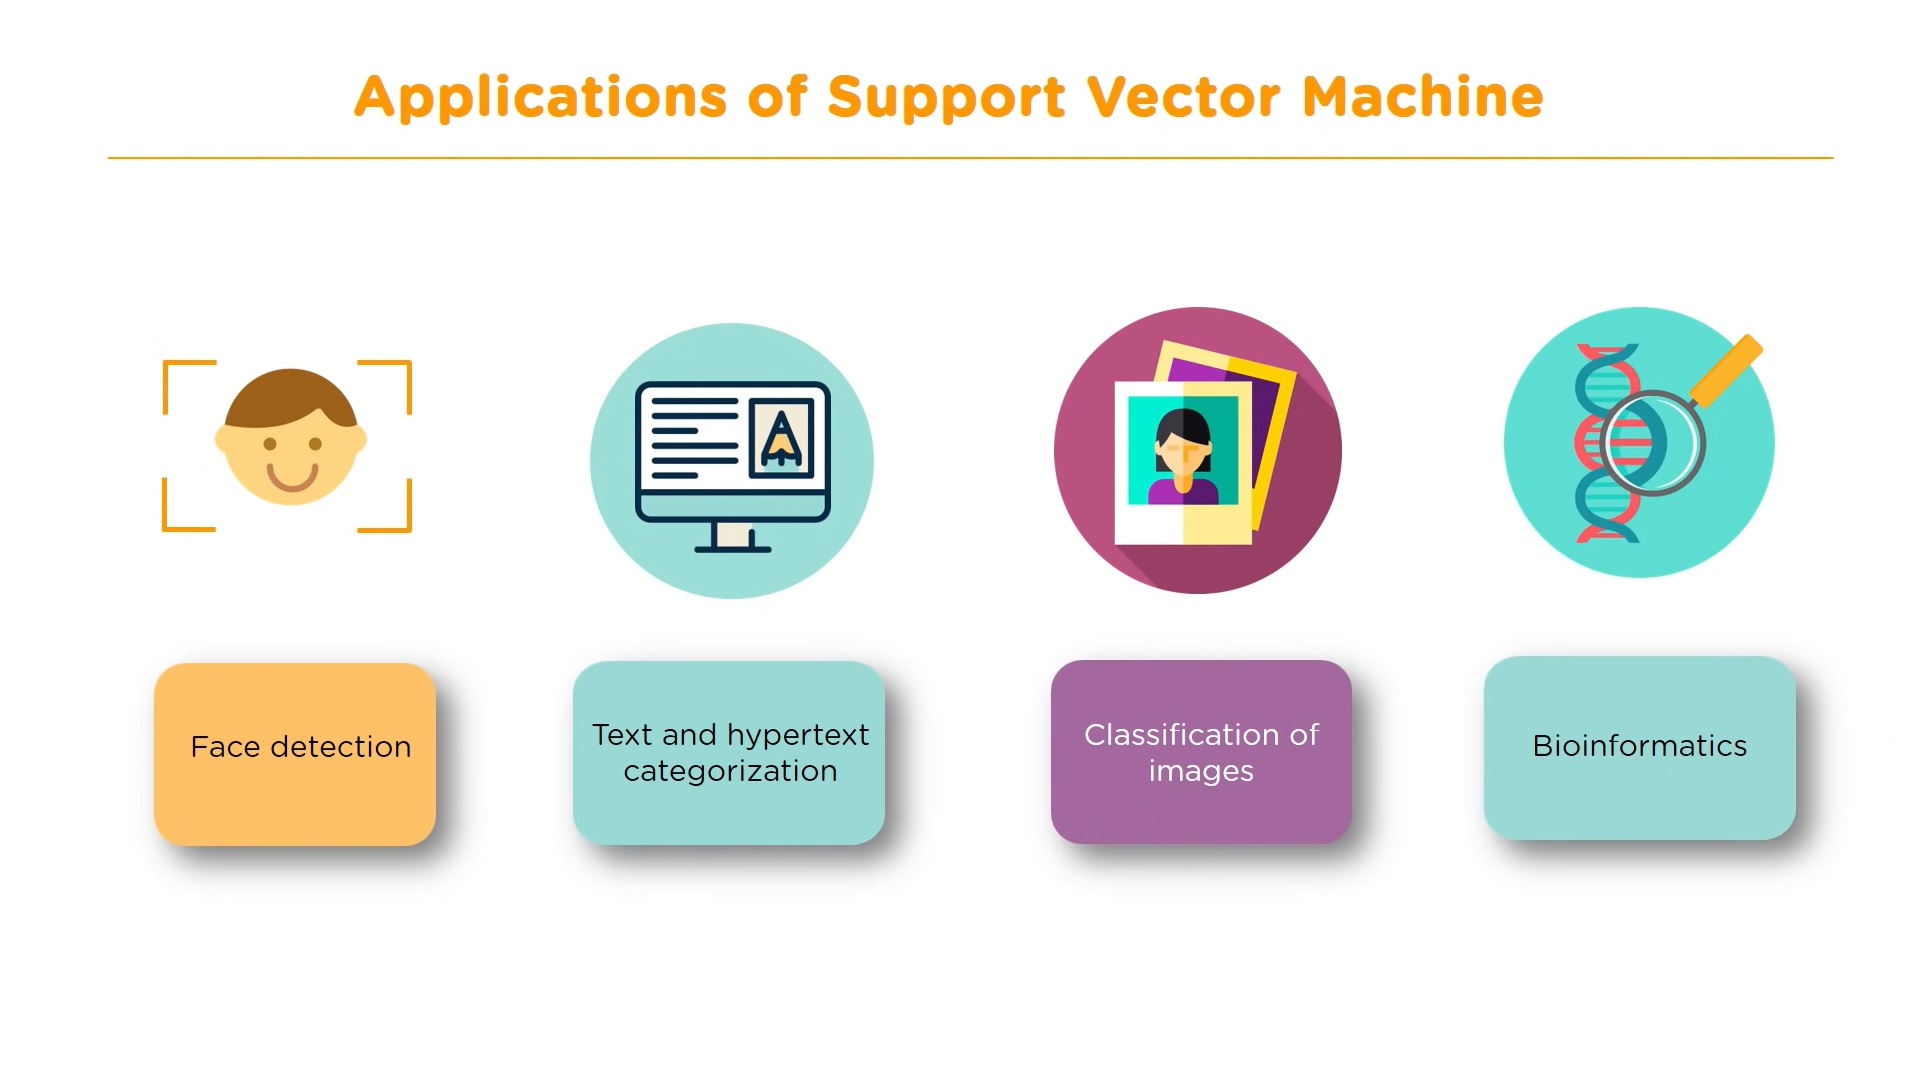

The idea is to identify/draw a line or plane which splits the data into the classes in best possible way. What is the best possible way? The line should have <b>maximum space that separates the classes. The distance between the points (Support Vectors) and the line (Hyperplane) should be as far as possible.<b>
The support vectors are the extreme points in a data set.
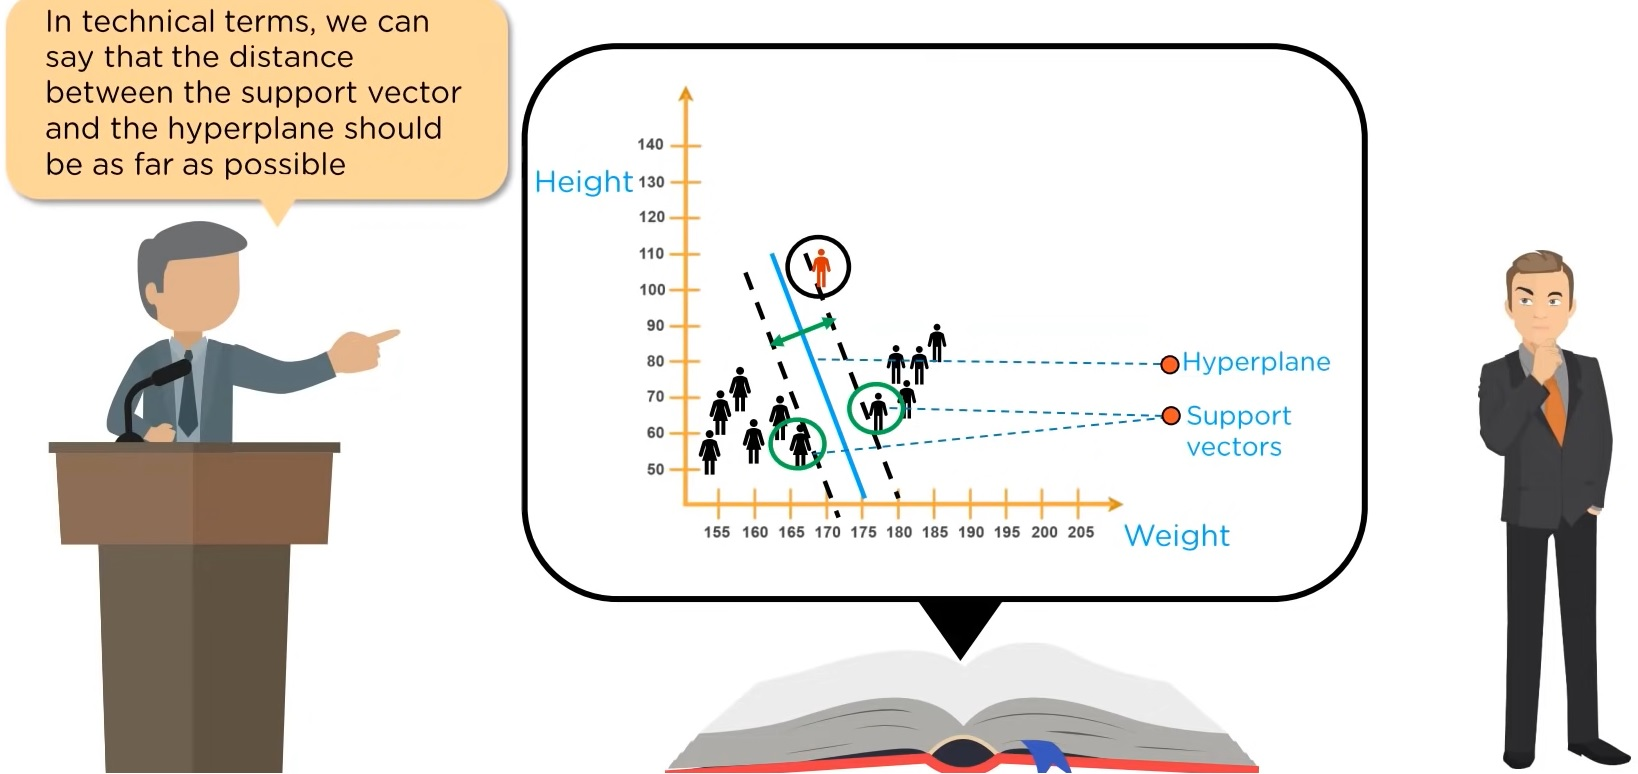

#### Distance Margine 
  It is the space between the extreme points in the data set.
    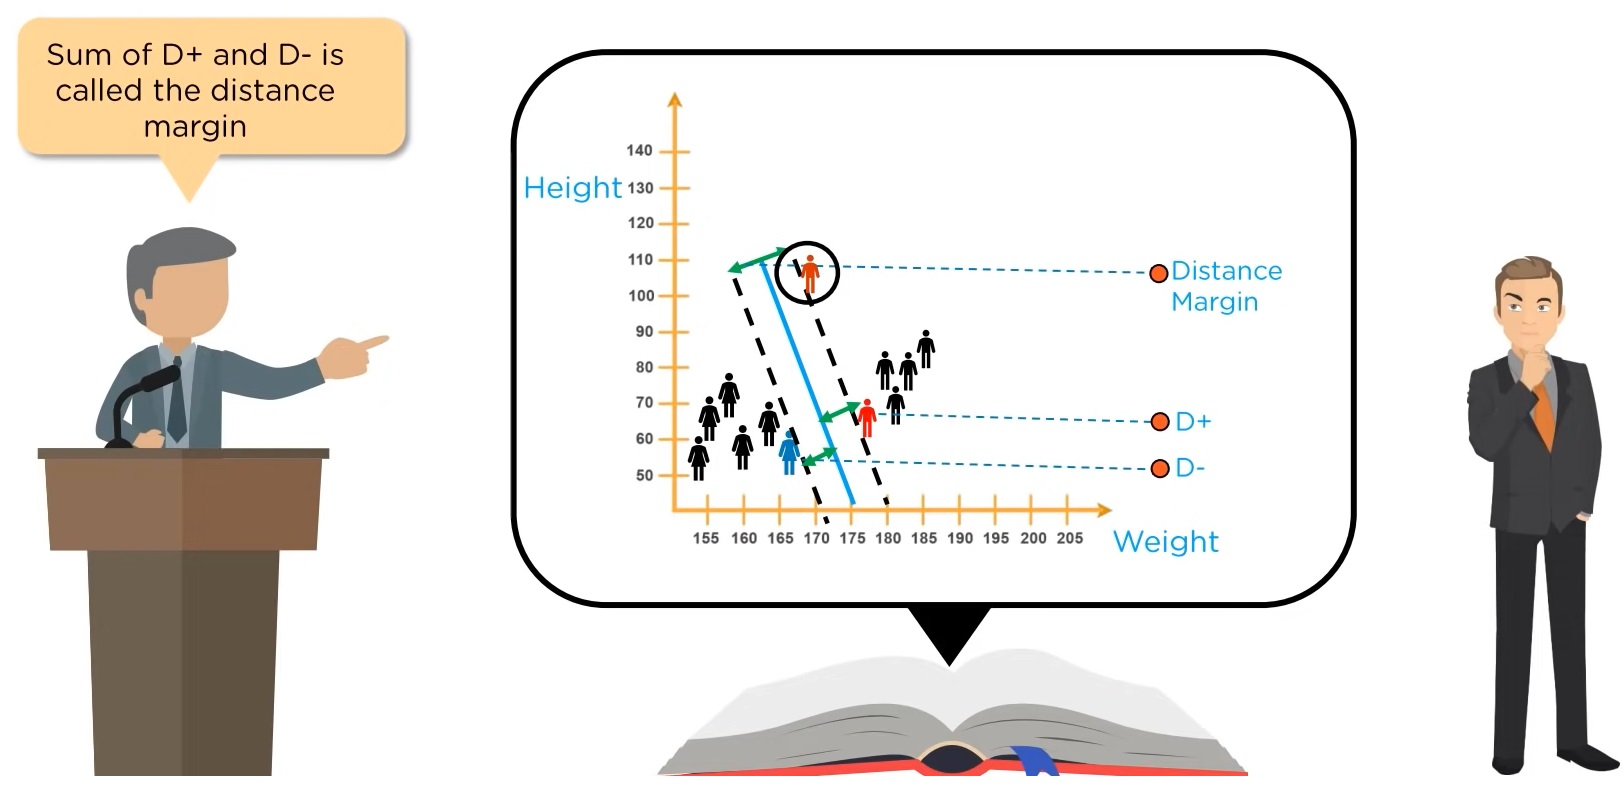

#### Distance Margine 
It is the space between the extream points in the data set
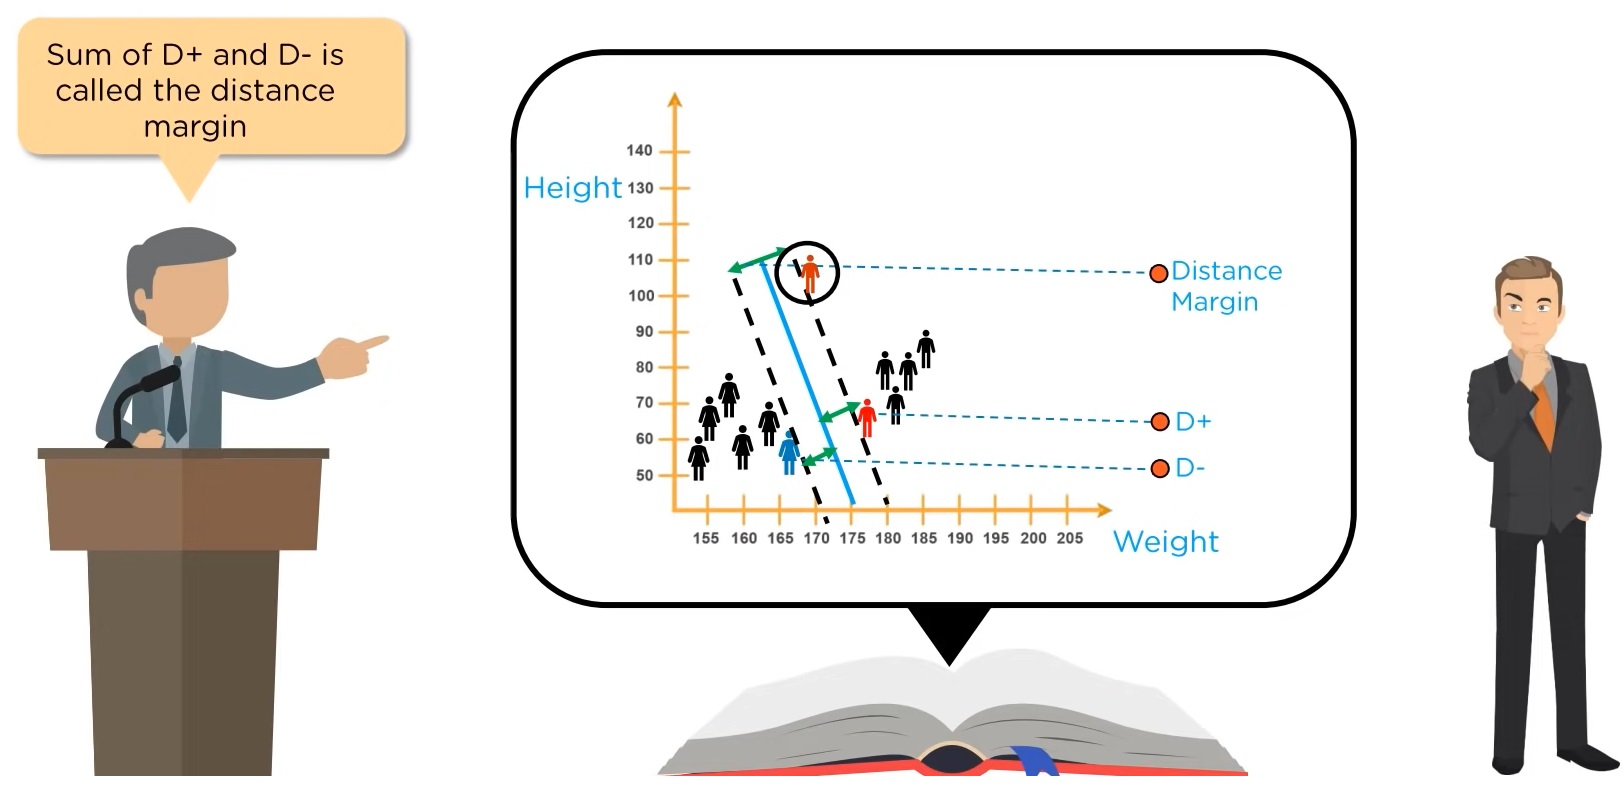

<b>Kernal Function</b> would transform a 1-D data into a 2-D or a 2-D data into a 3-D so that the data points could be separated. SVM has advantage over <b>higher dimensionality</b>, it can easily handle it.

## Hyperparameters of SVM

### 1. Gamma (High Gamma and Low Gamma)

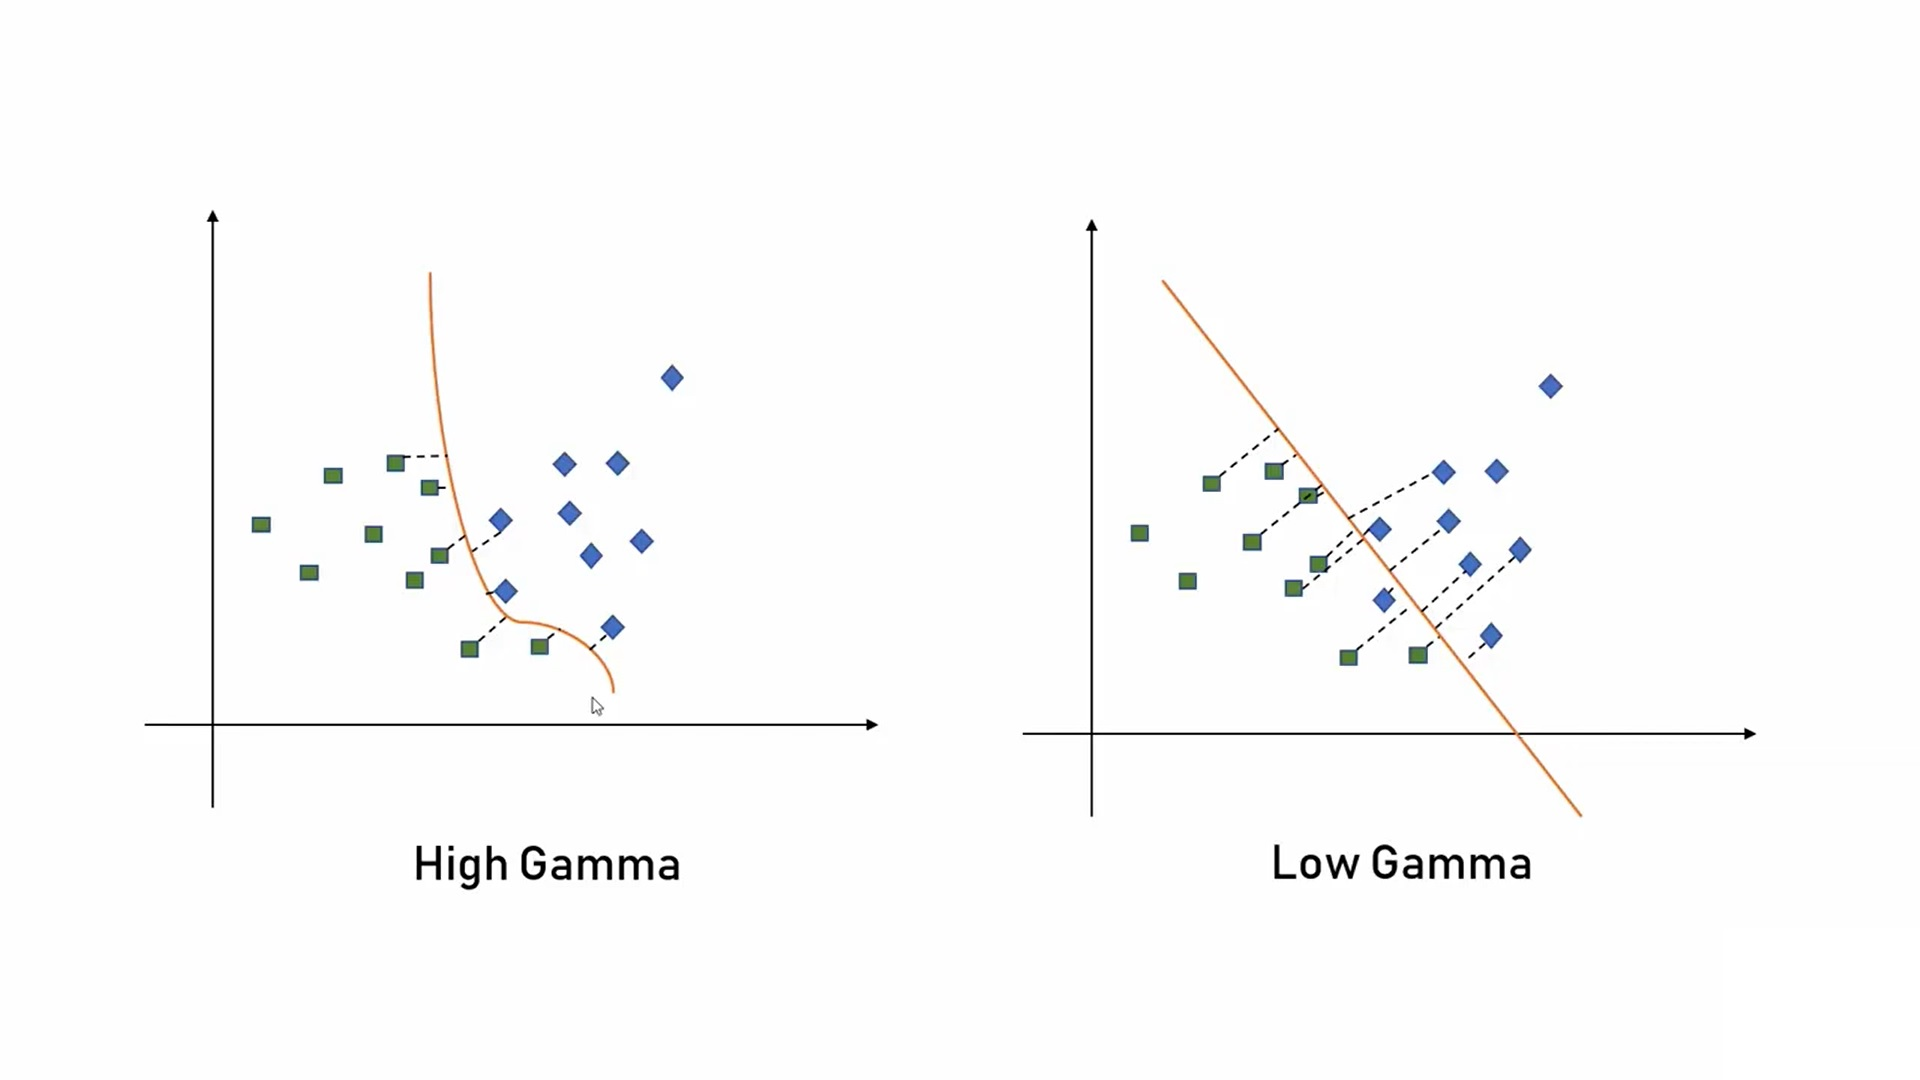

<b>High Gamma</b> - in this case we make the hyperplane by taking only nearby margins(support vectors).

<b>Low Gamma</b> - in this case we make the hyperplane by taking nearby margins(support vectors) and far away margins.

### 2. Regularization (High Regularization (c) and Low Regularization(c))
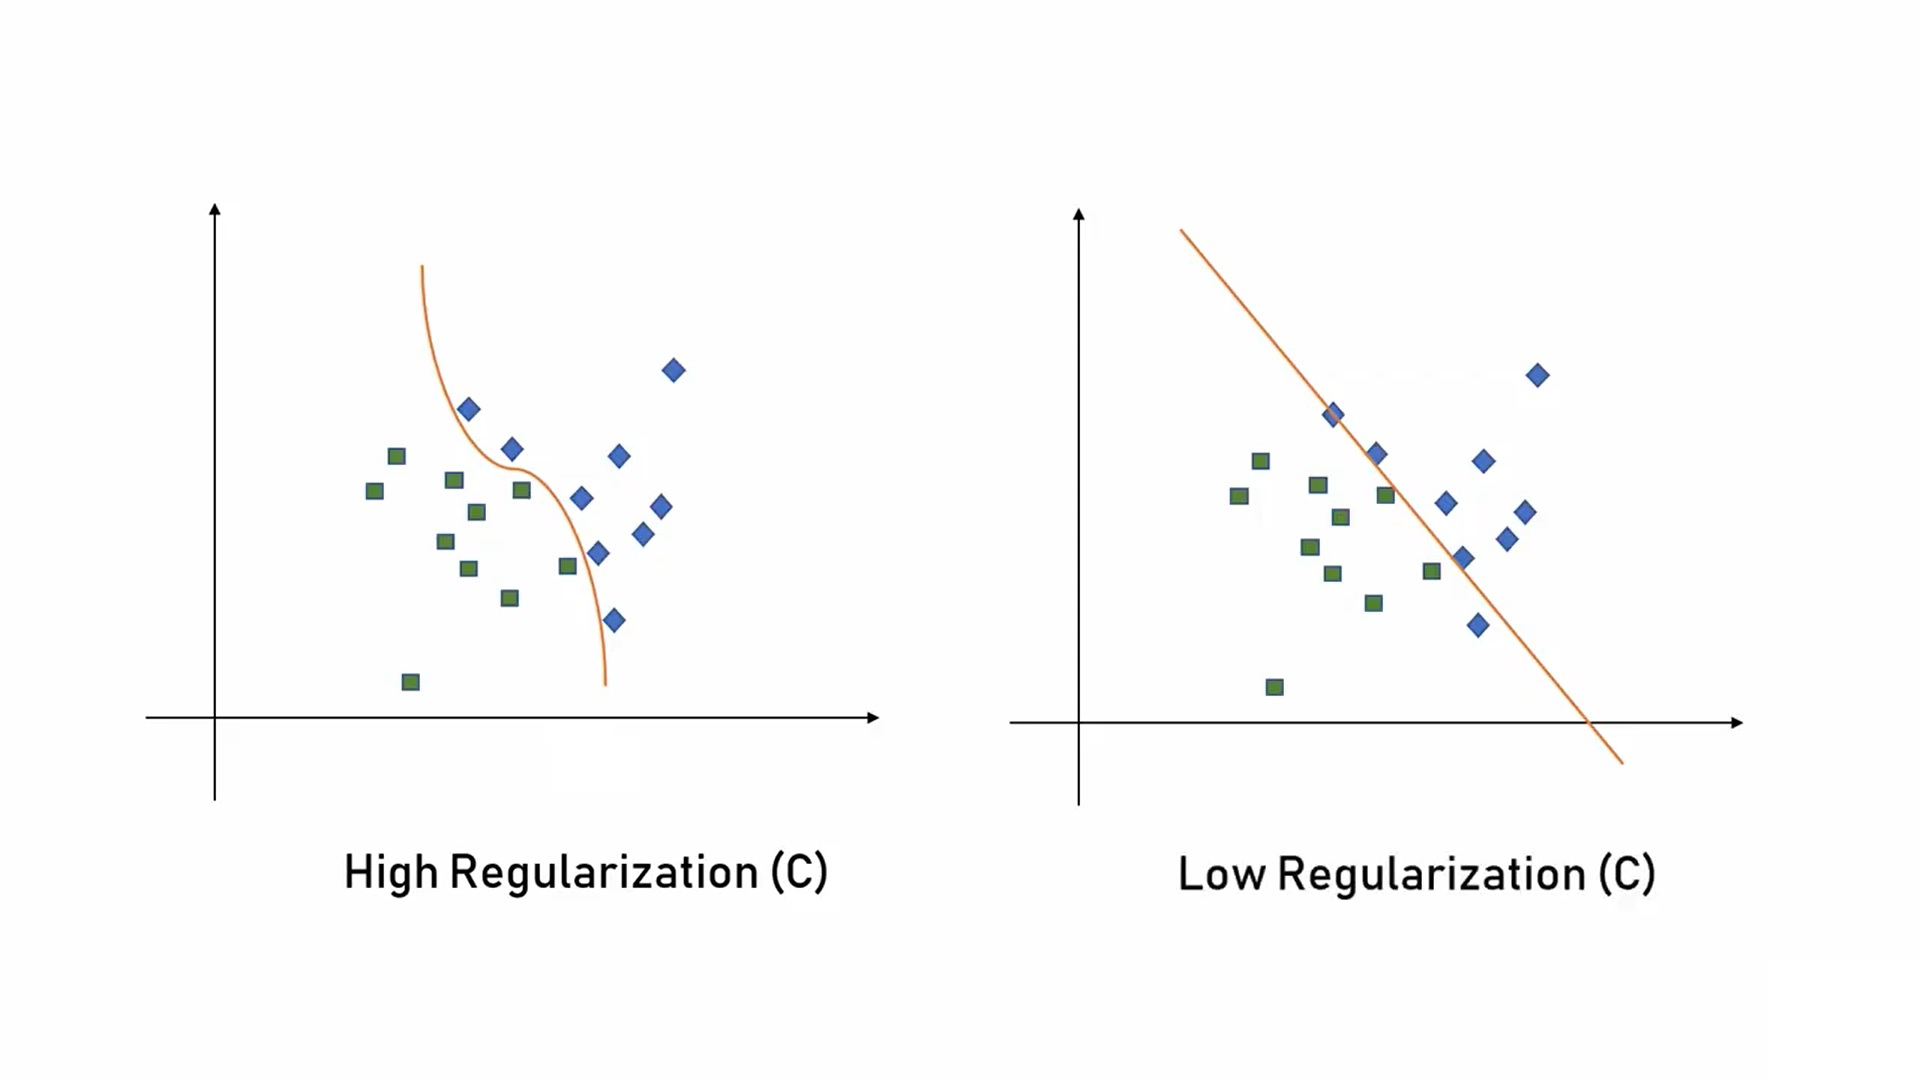

<b>High Regularization (c)</b> - The decision boundary/hyperplane is overfitted, so that the classification error remains very low. It takes high computational time.

<b>Low Regularization (c)</b> - The decision boundary/hyperplane is straight smooth which tolerated some classification erros. It takes low computational time.


### 3. Kernel

What if the data set can not be classified in 2-D. Look at the figure below. Then how you would draw the hyperplane.
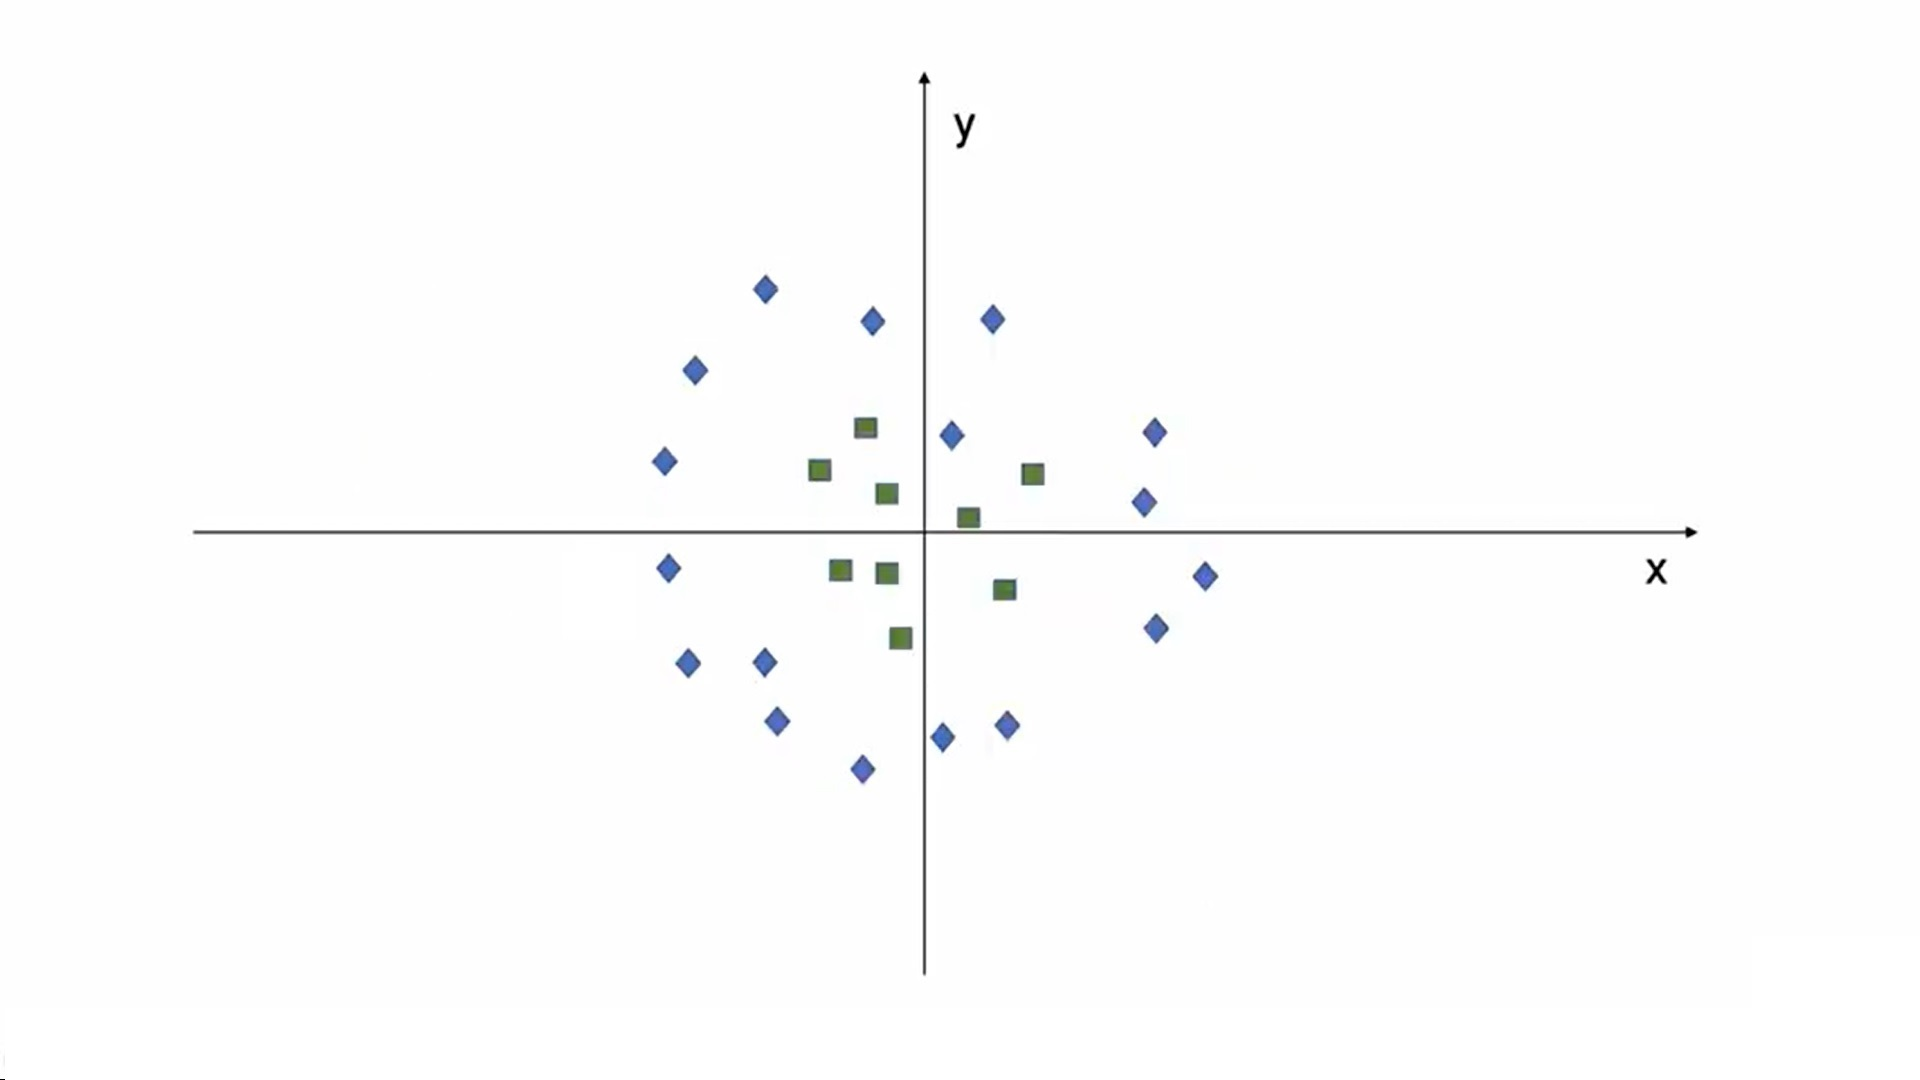


We would flip the data in such a way that Y-axis becomes perpendicular to you and a Z-axis could be introduced which is known as <b>Kernel</b>, where Z = X.square + Y.Square. This takes the data into higher dimensions and then classifying data becomes easy. We can visualize up to 3-D data but mathematically we can classify data into even higher dimensions.
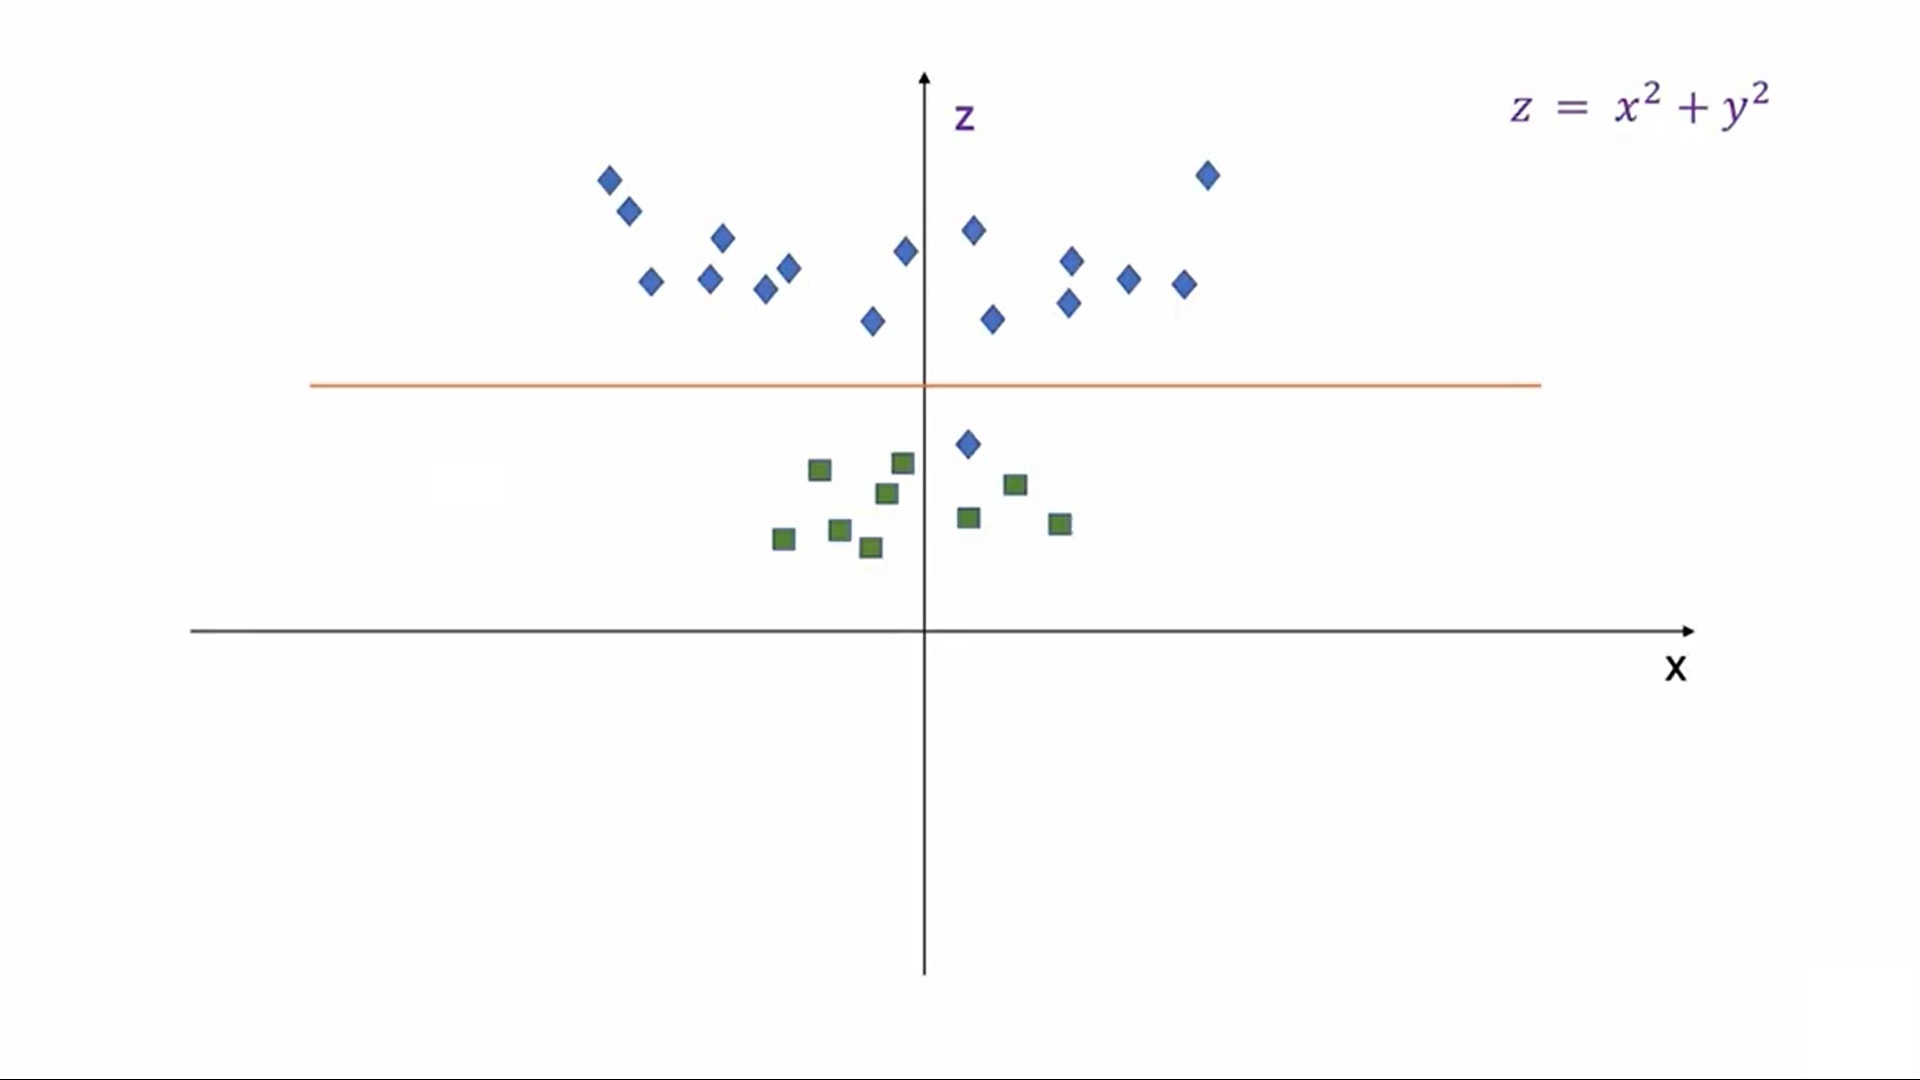

#### Other Hyperparameters 
> SVM has other than these hyperparameters as well like 'degree', 'decision_function_shape', 'max_iter', etc. Check the sklearn SVM docoumentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

## SVM Into Action

### Loading the data set and doing some basic data manipulations and visualizations.

In [71]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

Let's check the directory of iris dataset.

In [72]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [73]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [74]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

The data set has target divided into three different species of iris flower. With the help of features we have to classify which features belong to which species.   

In [75]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

It is a 2-D array, and we will convert it into pandas dataframe.

In [76]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Now add target column to the data frame.

In [77]:
df['target'] = iris.target
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

You might be wondering, what are these zeros in the target. So let's have a look at the target.

In [78]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

So, we can see zeros, ones and twos representing the three species of iris flower.

In [79]:
df[['target']].value_counts()

target
0         50
1         50
2         50
dtype: int64

These 0,1, and 2 are confusing and therefore we would rename the target columns as 'flower_name', and place the real species name in place of 0,1, and 2.

In [80]:
df['flower_name']=df.target.apply(lambda x: iris.target_names[x])
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target flower_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa

### Visualization

> <b>Question:</b> can we classify species on the basis of features?

For that we will make three datafrmaes for each species type.

In [81]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

#### Sepal length vs Sepal width (Setosa vs Versicolor)

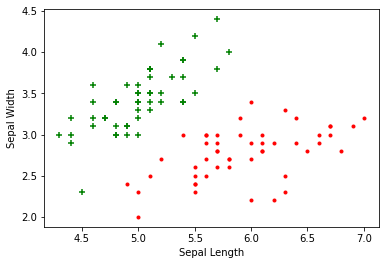

In [83]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="red",marker='.')

Yes! we can easily classify/separate 'setosa', 'versicolor' species with low gamma and low regularization

#### Petal length vs Petal width (Setosa vs Versicolor)

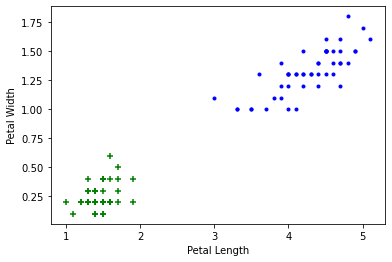

In [84]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

Yes! we can easily classify/separate 'setosa', 'versicolor' species with low gamma and low regularization

#### Petal length vs Petal width (Versicolor Vs Virginica)

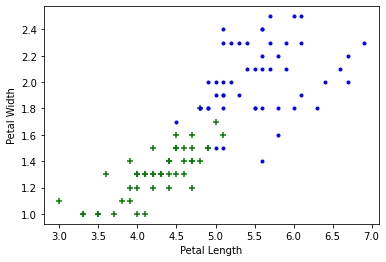

In [85]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="green",marker='+')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'],color="blue",marker='.')

Oh no! we can not easily classify/separate 'versicolor' and 'Virginica' species with low gamma and low regularization.

#### Sepal length vs Sepal width (Versicolor Vs Virginica)

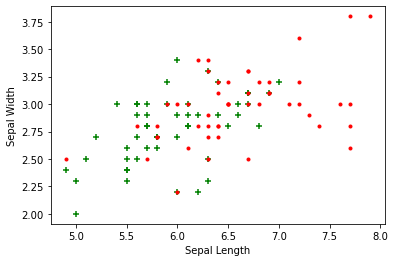

In [86]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="green",marker='+')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'],color="red",marker='.')

Oh no! we can not easily classify/separate 'versicolor' and 'Virginica' species with low gamma and low regularization.

>Implementing machine learning is not the only thing you would do as data scientist. Data preprocessing (Cleanin/Scrubbing data, reducing dimentions, feature engineering, etc) and data vizualization would make it easy to set hyperparameters to optimal state, where your model can perform best at it's maximum. So please do it and trust me it takes lots of skills and most of the time of a machine learning pipeline.

### SVM Implimentation

In [87]:
from sklearn.model_selection import train_test_split

Now drop the 'target' and 'flower_name column' to make rest of the column as independent variables.

In [88]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.flower_name

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [90]:
from sklearn.svm import SVC
model = SVC()

In [91]:
model.fit(X_train, y_train)

SVC()

In [92]:
model.score(X_test, y_test)

0.9666666666666667

Wow! we got an high test score accuracy.

let's predict the species type of the first row in the dataset. As you can see in the indipendent variables in the first row corresponds to setosa flower type. Let's check if our model predicts it to be setosa or some thing else.

In [93]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target flower_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa

In [94]:
# Entering the values from the first row.
model.predict([[5.1,3.5,1.4,0.2]])

array(['setosa'], dtype=object)

Great! it predicted accurately, but remember it won't predict accurately all the time, in fact no machine learning model is 100% accuarate. In our case we  have achieved a test accuarcy of 96% means we have an error of 4%.


#### Can we increase our test accuracy by hyperparameter tuning?

We will define a helper function to tune-test our model. By doing so, we wil not have to type the codes every time we tune.

In [95]:
def tunes_model(X_train,y_train,X_test,y_test, **params):
    model = SVC(**params)
    model.fit(X_train,y_train)
    model_accuarcy = model.score(X_test,y_test)
    return model_accuarcy

Let's check if our helper function is working prperly or not.

In [96]:
tunes_model(X_train,y_train,X_test,y_test)

0.9666666666666667

Yes! the accuray is same as above, so our helper function is working properly. Now try hyperparameter tuning with it.

#### 1. Regularization (C)

In [97]:
tunes_model(X_train,y_train,X_test,y_test, C=1)

0.9666666666666667

The default value of c is one, therfore no change in accuracy.

In [98]:
tunes_model(X_train,y_train,X_test,y_test, C=10)

0.9666666666666667

Make a for loop to see the chage in accuarcy accross different 'C' values

In [99]:
C=10
for i in range(1,10):
    print('The accuaracy of model when C =', i, 'is:',tunes_model(X_train,y_train,X_test,y_test, C=i))

The accuaracy of model when C = 1 is: 0.9666666666666667
The accuaracy of model when C = 2 is: 0.9666666666666667
The accuaracy of model when C = 3 is: 1.0
The accuaracy of model when C = 4 is: 0.9666666666666667
The accuaracy of model when C = 5 is: 0.9666666666666667
The accuaracy of model when C = 6 is: 0.9666666666666667
The accuaracy of model when C = 7 is: 0.9666666666666667
The accuaracy of model when C = 8 is: 0.9666666666666667
The accuaracy of model when C = 9 is: 0.9666666666666667


Thus, we can see that we have highest accuracy with 'C' value as 3.

<b>Note:</b> You have got an accuracy of hundred percent (when C=3) which is not possible in real life cases, here we have a very small data set and any thing extream is possible.

#### 2. Gamma

In [112]:
gamma=11
for i in range(1,11):
    print('The accuaracy of model when gamma =', i, 'is:',tunes_model(X_train,y_train,X_test,y_test, gamma=i))

The accuaracy of model when gamma = 1 is: 0.9666666666666667
The accuaracy of model when gamma = 2 is: 0.9666666666666667
The accuaracy of model when gamma = 3 is: 0.9666666666666667
The accuaracy of model when gamma = 4 is: 0.9666666666666667
The accuaracy of model when gamma = 5 is: 0.9666666666666667
The accuaracy of model when gamma = 6 is: 0.9666666666666667
The accuaracy of model when gamma = 7 is: 0.9333333333333333
The accuaracy of model when gamma = 8 is: 0.9333333333333333
The accuaracy of model when gamma = 9 is: 0.8666666666666667
The accuaracy of model when gamma = 10 is: 0.8333333333333334


We can see that, when gamma is increased above the value of 6, it starts to decrease. (Results are exclusive for this case only)

#### 3. Kernel

In [101]:
tunes_model(X_train,y_train,X_test,y_test, kernel='linear')

0.9666666666666667

In [102]:
tunes_model(X_train,y_train,X_test,y_test, kernel='poly')

0.9333333333333333

In [103]:
tunes_model(X_train,y_train,X_test,y_test, kernel='sigmoid')

0.2

In [104]:
tunes_model(X_train,y_train,X_test,y_test, kernel='rbf')

0.9666666666666667

Thus we have best accuracy with linear and poly kernels.

Now, let's combine these hyperparameters and check the accuracy.

In [114]:
tunes_model(X_train,y_train,X_test,y_test, C=3,gamma=1,kernel='linear')

0.9333333333333333

We can see, that when combined all the best hyperparameters the accuracy decreased from 96% to 93%. This means that it's not necessary that a model's prformance would increase if all the hyperparameters are tuned for their best values and applied altogether.

Try to tune other hyperparameters and calculate the accuaracy. 